In [1]:
# pip install missingno
# pip install pandas
# pip install yahoo-finance
# pip install numpy
# pip install scikit-learn
# pip install kneed
# pip install dataframe_image
#pip install scipy
# pip install statsmodels

In [2]:
import yahoo_fin.stock_info as si
import yfinance as yf
import pandas as pd
import missingno
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from statsmodels.tsa.stattools import coint
import dataframe_image as dfi
import seaborn as sns
from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import adfuller
from scipy.stats.stats import pearsonr

C:\Users\Kamitsuki\AppData\Local\Temp\ipykernel_4476\528774488.py:17: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
# Extract the S&P 500 data from the past 5 years
# Sometimes the code is not correctly working, I guess it's because of the API error. Try to re-run it again.
nasdaq_list = si.tickers_sp500()
nasdaq_historical = {}
for ticker in nasdaq_list:
    nasdaq_historical[ticker] = si.get_data(ticker, start_date="01/01/2020", index_as_date = False, interval="1d")
    print(ticker)
nasdaq_historical

A
AAL
AAP
AAPL
ABBV
ABC
ABT
ACGL
ACN
ADBE
ADI
ADM
ADP
ADSK
AEE
AEP
AES
AFL
AIG
AIZ
AJG
AKAM
ALB
ALGN
ALK
ALL
ALLE
AMAT
AMCR
AMD
AME
AMGN
AMP
AMT
AMZN
ANET
ANSS
AON
AOS
APA
APD
APH
APTV
ARE
ATO
ATVI
AVB
AVGO
AVY
AWK
AXP
AZO
BA
BAC
BALL
BAX
BBWI
BBY
BDX
BEN
BF-B
BIIB
BIO
BK
BKNG
BKR
BLK
BMY
BR
BRK-B
BRO
BSX
BWA
BXP
C
CAG
CAH
CARR
CAT
CB
CBOE
CBRE
CCI
CCL
CDAY
CDNS
CDW
CE
CEG
CF
CFG
CHD
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COO
COP
COST
CPB
CPRT
CPT
CRL
CRM
CSCO
CSGP
CSX
CTAS
CTLT
CTRA
CTSH
CTVA
CVS
CVX
CZR
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISH
DLR
DLTR
DOV
DOW
DPZ
DRI
DTE
DUK
DVA
DVN
DXC
DXCM
EA
EBAY
ECL
ED
EFX
EIX
EL
ELV
EMN
EMR
ENPH
EOG
EPAM
EQIX
EQR
EQT
ES
ESS
ETN
ETR
ETSY
EVRG
EW
EXC
EXPD
EXPE
EXR
F
FANG
FAST
FCX
FDS
FDX
FE
FFIV
FIS
FISV
FITB
FLT
FMC
FOX
FOXA
FRC
FRT
FSLR
FTNT
FTV
GD
GE
GEN
GILD
GIS
GL
GLW
GM
GNRC
GOOG
GOOGL
GPC
GPN
GRMN
GS
GWW
HAL
HAS
HBAN
HCA
HD
HES
HIG
HII
HLT
HOLX
HON
HPE
HPQ
HRL
HSIC
HST
HSY
HUM
HWM
IBM
ICE
IDXX
IEX
IFF
ILMN
INCY
INTC


{'A':           date        open        high         low       close    adjclose  \
 0   2020-01-02   85.900002   86.349998   85.199997   85.949997   84.371025   
 1   2020-01-03   84.669998   85.330002   84.500000   84.570000   83.016365   
 2   2020-01-06   84.000000   84.820000   83.599998   84.820000   83.261772   
 3   2020-01-07   83.959999   85.260002   83.940002   85.080002   83.517006   
 4   2020-01-08   85.959999   86.470001   85.199997   85.919998   84.341568   
 ..         ...         ...         ...         ...         ...         ...   
 747 2022-12-19  148.910004  149.130005  146.240005  146.949997  146.949997   
 748 2022-12-20  147.270004  149.179993  145.880005  147.929993  147.929993   
 749 2022-12-21  148.940002  150.270004  147.889999  150.089996  150.089996   
 750 2022-12-22  148.410004  149.190002  146.610001  149.009995  149.009995   
 751 2022-12-23  149.009995  150.250000  148.220001  149.414993  149.414993   
 
       volume ticker  
 0    1410500      A  

In [4]:
nasdaq_historical

{'A':           date        open        high         low       close    adjclose  \
 0   2020-01-02   85.900002   86.349998   85.199997   85.949997   84.371025   
 1   2020-01-03   84.669998   85.330002   84.500000   84.570000   83.016365   
 2   2020-01-06   84.000000   84.820000   83.599998   84.820000   83.261772   
 3   2020-01-07   83.959999   85.260002   83.940002   85.080002   83.517006   
 4   2020-01-08   85.959999   86.470001   85.199997   85.919998   84.341568   
 ..         ...         ...         ...         ...         ...         ...   
 747 2022-12-19  148.910004  149.130005  146.240005  146.949997  146.949997   
 748 2022-12-20  147.270004  149.179993  145.880005  147.929993  147.929993   
 749 2022-12-21  148.940002  150.270004  147.889999  150.089996  150.089996   
 750 2022-12-22  148.410004  149.190002  146.610001  149.009995  149.009995   
 751 2022-12-23  149.009995  150.250000  148.220001  149.414993  149.414993   
 
       volume ticker  
 0    1410500      A  

In [5]:
data = pd.concat(nasdaq_historical)
data.reset_index(drop=True, inplace=True)
data = data.pivot(index='date', columns='ticker', values = 'adjclose')

In [6]:
# Drop  missing data
missing = data.isnull().mean().sort_values(ascending=False)
drop_list = sorted(list(missing[missing > 0.1].index))
data.drop(labels=drop_list, axis=1, inplace=True)

In [7]:
len(data.T)

501

In [8]:
# Delete inf and null data
column_headers = list(data.columns)
for i in range (len(data.T)):
    column=column_headers[i]
    if(data[column].isnull().values.any() or np.isinf(data[column].values.sum())):
        data.drop(labels=column,axis=1,inplace=True)
    

In [9]:
len(data.T)

499

In [10]:
# Check
data=data.fillna(value=0, limit=1)
data = data.fillna(method='ffill')
print("Null value is ",data.isnull().values.any())
print("Inf value is ",np.isinf(data.values.sum()))

Null value is  False
Inf value is  False


In [11]:
data0=data.copy(deep=True)

In [12]:
data.to_csv('S&P500.csv', index=False)

In [13]:
# Start the calculation 
# 252 trading days in a year

returns = data.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['returns']

returns['volatility'] = data.pct_change().std()*np.sqrt(252)
data = returns
data.head()

returns  volatility
ticker                      
A       0.242129    0.317457
AAL    -0.019127    0.737824
AAP     0.053646    0.375910
AAPL    0.261833    0.369461
ABBV    0.284048    0.266594

In [14]:
# Then make a copy of the dataFrame for later use
data1=data.copy(deep=True)

In [15]:

#Fit the scaler
X = pd.DataFrame(StandardScaler().fit(data).fit_transform(data),columns = data.columns, index = data.index)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


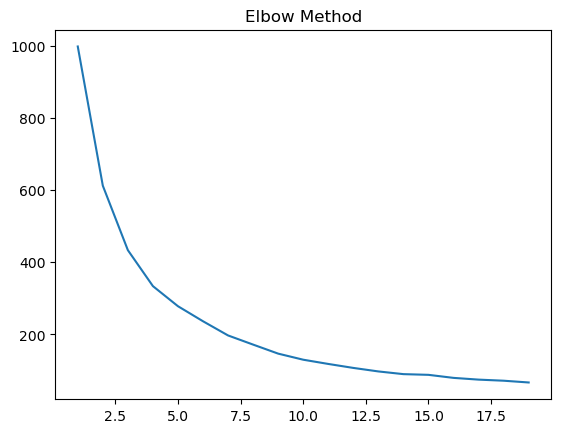

In [16]:
# Use Elbow method to determine the K value
K = range(1,20)
distortions = []
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
plt.plot(K, distortions)
plt.title('Elbow Method')
plt.show()

In [17]:
# We know the K-value we should use
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
# Save the number of clusters using b
a=kl.elbow
a

5

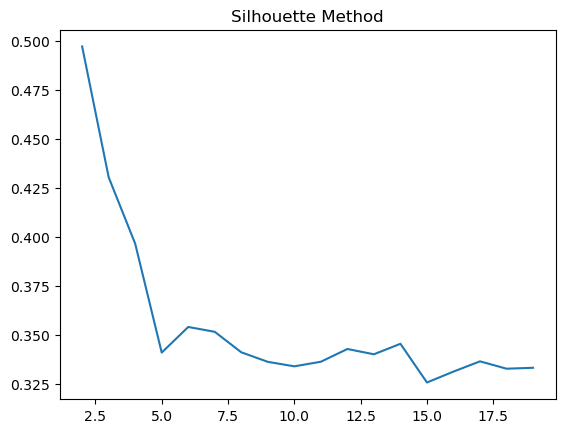

5

In [18]:
# Use Silhouette method to determine the K value
K = range(2,20)
silhouettes = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))
plt.plot(K, silhouettes)
plt.title('Silhouette Method')
plt.show()

kl = KneeLocator(K, silhouettes, curve="convex", direction="decreasing")
# Save the number of clusters using b
b=kl.elbow
b

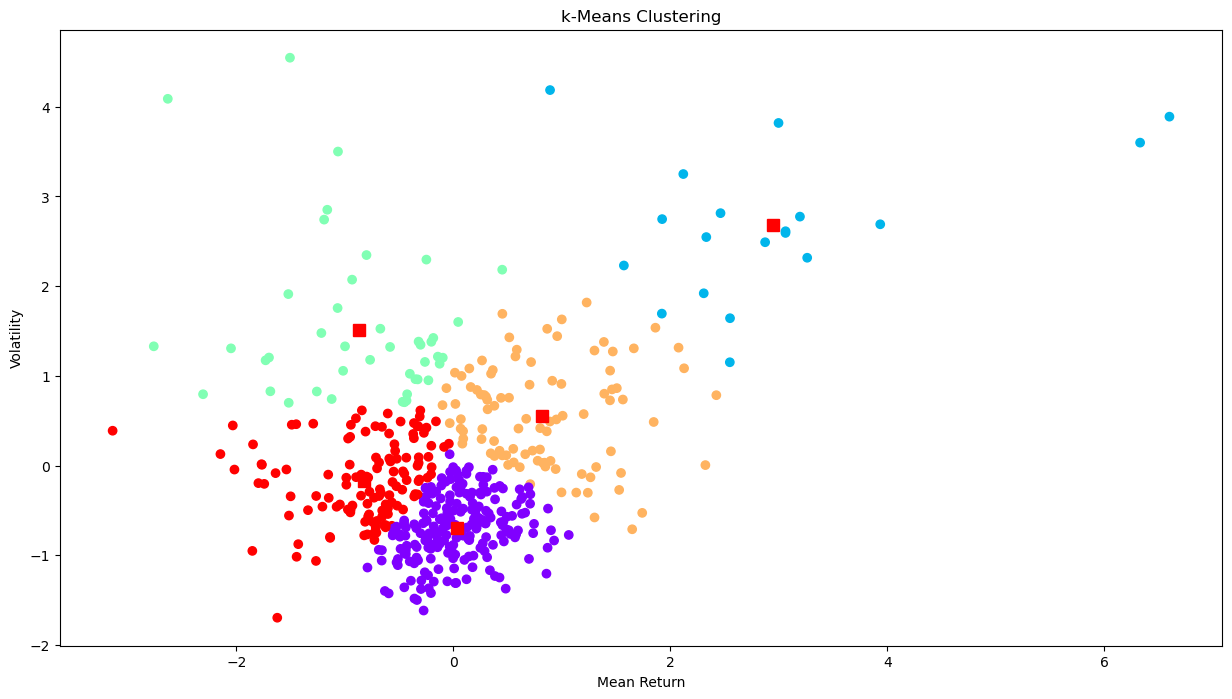

In [19]:
# Apply the K-means model for the silhoutte
k_means = KMeans(n_clusters=a)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Clustering')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.plot(centroids[:,0],centroids[:,1],'rs',markersize=8)
plt.show()

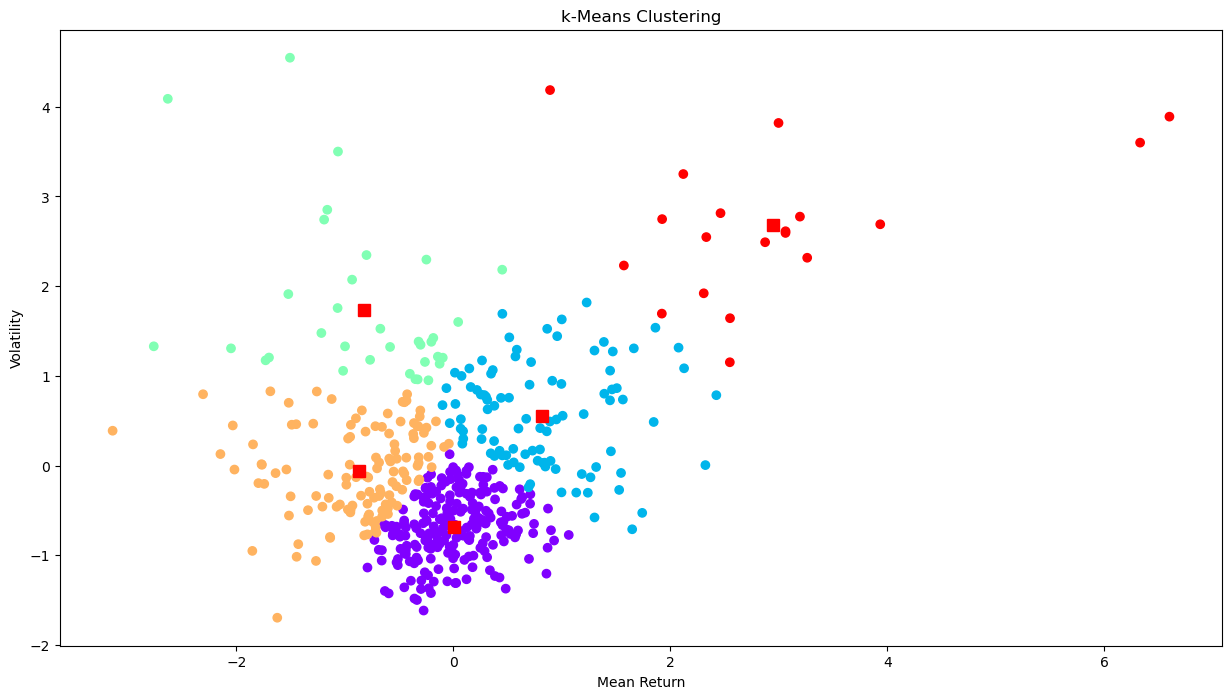

In [20]:
# Apply the K-means model for the elbow
k_means = KMeans(n_clusters=b)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Clustering')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.plot(centroids[:,0],centroids[:,1],'rs',markersize=8)
plt.show()

In [21]:
clustered_groups = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_groups_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_groups = clustered_groups[clustered_groups != -1]

In [22]:
cluster_size_limit = 1000
counts = clustered_groups.value_counts()
ticker_count = counts[(counts>1) & (counts<=cluster_size_limit)]
print ("Number of clusters: %d" % len(ticker_count))
print ("Number of Pairs: %d" % (ticker_count*(ticker_count-1)).sum())

Number of clusters: 5
Number of Pairs: 76686


In [23]:
clustered_groups

ticker
A       0
AAL     2
AAP     3
AAPL    0
ABBV    0
       ..
YUM     0
ZBH     3
ZBRA    3
ZION    3
ZTS     0
Length: 499, dtype: int32

In [24]:
clustered_pair=pd.DataFrame()
clustered_pair['First Stock']=[]
clustered_pair['Second Stock']=[]
clustered_pair

Empty DataFrame
Columns: [First Stock, Second Stock]
Index: []

In [25]:
clustered_groups

ticker
A       0
AAL     2
AAP     3
AAPL    0
ABBV    0
       ..
YUM     0
ZBH     3
ZBRA    3
ZION    3
ZTS     0
Length: 499, dtype: int32

In [26]:
store_pairs=np.array([["0","0"]],dtype=str)

In [27]:
store_pairs

array([['0', '0']], dtype='<U1')

In [28]:
clustered_groups.index[0]

'A'

In [29]:
for i in range(len(clustered_groups)):
    belong_group=clustered_groups.iloc[i]
    for j in range(i+1,len(clustered_groups)):
        if(clustered_groups.iloc[j]==belong_group):
            store_pairs=np.concatenate((store_pairs,np.array([[clustered_groups.index[i],clustered_groups.index[j]]],dtype=str)),axis=0)

In [30]:
store_pairs=np.delete(store_pairs, (0), axis=0)

In [31]:
store_pairs

array([['A', 'AAPL'],
       ['A', 'ABBV'],
       ['A', 'ABC'],
       ...,
       ['ZBH', 'ZBRA'],
       ['ZBH', 'ZION'],
       ['ZBRA', 'ZION']], dtype='<U5')

In [32]:
df=pd.DataFrame(store_pairs)

In [33]:
df.to_csv('pairs.csv', index=False)

In [34]:
clustered_groups.to_csv('SP500_2019.csv', index=True)

<h1> After First run, we can just read the csv file to obtain the data again

In [101]:
clustered_groups = pd.read_csv('pairs.csv')
data0=pd.read_csv("S&P500.csv")

In [102]:
clustered_groups

0     1
0         A  AAPL
1         A  ABBV
2         A   ABC
3         A   ABT
4         A  ACGL
...     ...   ...
38338   XYL   ZTS
38339   YUM   ZTS
38340   ZBH  ZBRA
38341   ZBH  ZION
38342  ZBRA  ZION

[38343 rows x 2 columns]

In [103]:
data0[clustered_groups.iloc[0][0]].values

array([ 84.37102509,  83.01636505,  83.26177216,  83.51700592,
        84.34156799,  85.66677094,  85.980896  ,  85.85327911,
        86.37354279,  86.99196625,  87.81654358,  88.4644165 ,
        87.96378326,  88.47423553,  87.43369293,  86.63859558,
        84.96982574,  85.57843018,  85.6373291 ,  82.8298645 ,
        81.04329681,  80.64083862,  81.98565674,  83.36975861,
        83.26177216,  81.64209747,  82.87895203,  83.52681732,
        83.86057281,  83.89984894,  84.2434082 ,  83.23233795,
        83.78204346,  82.79059601,  83.50719452,  79.02114105,
        76.51798248,  76.67504883,  76.0075531 ,  75.65415955,
        80.46414948,  78.84444427,  82.80042267,  78.98187256,
        77.11678314,  69.45026398,  71.57058716,  67.57535553,
        62.25491714,  67.92874146,  62.95187759,  69.14595032,
        67.60479736,  64.55194092,  65.23908234,  62.20583725,
        65.76914978,  67.73240662,  72.36569977,  69.60732269,
        71.51652527,  70.48320007,  67.8260498 ,  71.14

In [104]:
data0[clustered_groups.iloc[0][1]]

0       73.561539
1       72.846375
2       73.426819
3       73.081490
4       74.257111
          ...    
747    132.369995
748    132.300003
749    135.449997
750    132.229996
751    131.003998
Name: AAPL, Length: 752, dtype: float64

In [105]:
cluster_dict = {}
n = data0.shape[1]
keys=data0.keys()
pairs=[]
for i in range(len(clustered_groups)):
    Stock_target1 = data0[clustered_groups.iloc[i][0]].values
    Stock_target2= data0[clustered_groups.iloc[i][1]].values
    score, pvalue, _ = coint(Stock_target1, Stock_target2)
    if (pvalue < 0.01):
        pairs.append((clustered_groups.iloc[i][0], clustered_groups.iloc[i][1]))
    
print ("Number of pairs:", len(pairs))

Number of pairs: 1110


In [106]:
cointegrated_pairs_df=pd.DataFrame(pairs)
cointegrated_pairs_df.to_csv('Cointegrated_pairs.csv', index=False)

In [107]:
cointegrated_pairs=pairs

<h1> Read from Excel again

In [108]:
cointegrated_pairs = pd.read_csv('Cointegrated_pairs.csv')

In [109]:
cointegrated_pairs=np.array(cointegrated_pairs)

In [110]:
cointegrated_pairs

array([['AAL', 'MHK'],
       ['AAL', 'WDC'],
       ['AAP', 'EW'],
       ...,
       ['WEC', 'WM'],
       ['WEC', 'WRB'],
       ['WST', 'ZTS']], dtype=object)

In [111]:
def correlation_test(price_1,price_2):
    return pearsonr(price_1,price_2)[0]

In [112]:
data0[cointegrated_pairs[0][1]]

0      134.789993
1      130.949997
2      131.000000
3      128.009995
4      127.610001
          ...    
747     95.419998
748     94.080002
749     97.239998
750     96.889999
751     97.559998
Name: MHK, Length: 752, dtype: float64

In [113]:
correlation_pairs=np.array([["0","0"]])
for i in range(len(cointegrated_pairs)):
    Stock_target1 = data0[cointegrated_pairs[i][0]].values
    Stock_target2= data0[cointegrated_pairs[i][1]].values
    correlation_value = correlation_test(Stock_target1, Stock_target2)
    if (correlation_value > 0.8):
        correlation_pairs=np.concatenate((correlation_pairs,[[cointegrated_pairs[i][0], cointegrated_pairs[i][1]]]))
    
print ("Number of pairs:", len(correlation_pairs))

Number of pairs: 471


In [114]:
correlation_pairs=np.delete(correlation_pairs,0,axis=0)

In [115]:
correlation_pairs

array([['AAL', 'WDC'],
       ['AAP', 'EW'],
       ['AAP', 'NTAP'],
       ['AAP', 'NTRS'],
       ['AAPL', 'JBHT'],
       ['AAPL', 'TMO'],
       ['AAPL', 'UNP'],
       ['ABBV', 'ABC'],
       ['ABBV', 'ADM'],
       ['ABC', 'ADM'],
       ['ABC', 'WRB'],
       ['ABT', 'AOS'],
       ['ABT', 'DD'],
       ['ABT', 'EL'],
       ['ABT', 'EMN'],
       ['ABT', 'NSC'],
       ['ABT', 'SHW'],
       ['ABT', 'TEL'],
       ['ACGL', 'RE'],
       ['ACN', 'FAST'],
       ['ACN', 'MSFT'],
       ['ADI', 'EMR'],
       ['ADI', 'MLM'],
       ['ADI', 'ORCL'],
       ['ADI', 'VMC'],
       ['ADI', 'YUM'],
       ['ADP', 'PM'],
       ['ADSK', 'MMM'],
       ['ADSK', 'QRVO'],
       ['AEE', 'CNP'],
       ['AEE', 'COST'],
       ['AEE', 'GD'],
       ['AEE', 'KO'],
       ['AEE', 'LHX'],
       ['AEE', 'PFE'],
       ['AEE', 'PM'],
       ['AEE', 'PSA'],
       ['AEE', 'RSG'],
       ['AEE', 'UNH'],
       ['AEE', 'WM'],
       ['AEP', 'ETR'],
       ['AEP', 'HSY'],
       ['AEP', 'KO'],
     

In [116]:
correlation_pairs_df=pd.DataFrame(correlation_pairs)
correlation_pairs_df.to_csv('correlation_pairs.csv', index=False)

<h1> Read Again (check point)

In [117]:
correlation_pairs = pd.read_csv('correlation_pairs.csv')

In [119]:
# Check the anti-persistent time-series
def Calculate_hurst_exponenet(ts):
    lags=range(2,100) 
    tau=[np.sqrt(np.std(np.subtract(ts[lag:],ts[:-lag])))for lag in lags]
    poly=np.polyfit(np.log(lags),np.log(tau),1) 
    return poly[0]*2.0

In [125]:
correlation_pairs=np.array(correlation_pairs)

In [129]:
Calculate_hurst_exponenet((data0[correlation_pairs[0][0]].values)/data0[correlation_pairs[0][1]].values)

0.27014752197759107

In [139]:
Mean_Reverting_pairs=np.array([["0","0"]])
for i in range(len(correlation_pairs)):
    Stock_target1 = data0[correlation_pairs[i][0]].values
    Stock_target2= data0[correlation_pairs[i][1]].values
    hurst_exponenet = Calculate_hurst_exponenet(Stock_target1/Stock_target2)
    hurst_exponenet1 = Calculate_hurst_exponenet(Stock_target1)
    hurst_exponenet2 = Calculate_hurst_exponenet(Stock_target2)
    if (hurst_exponenet < 0.4 and hurst_exponenet1 <0.4 and hurst_exponenet2 <0.4):
        Mean_Reverting_pairs=np.concatenate((Mean_Reverting_pairs,[[correlation_pairs[i][0], correlation_pairs[i][1]]]))
Mean_Reverting_pairs=np.delete(Mean_Reverting_pairs,0,axis=0)
print ("Number of pairs:", len(Mean_Reverting_pairs))

Number of pairs: 190


In [140]:
Mean_Reverting_pairs

array([['AAP', 'EW'],
       ['AAP', 'NTRS'],
       ['ABC', 'WRB'],
       ['ABT', 'NSC'],
       ['ADI', 'EMR'],
       ['ADI', 'VMC'],
       ['ADI', 'YUM'],
       ['ADP', 'PM'],
       ['AEE', 'CNP'],
       ['AEE', 'COST'],
       ['AEE', 'GD'],
       ['AEE', 'KO'],
       ['AEE', 'LHX'],
       ['AEE', 'PFE'],
       ['AEE', 'PM'],
       ['AEE', 'RSG'],
       ['AEE', 'UNH'],
       ['AEE', 'WM'],
       ['AEP', 'ETR'],
       ['AEP', 'HSY'],
       ['AEP', 'KO'],
       ['AEP', 'NOC'],
       ['AEP', 'WRB'],
       ['AFL', 'SJM'],
       ['AJG', 'MCD'],
       ['AJG', 'UNH'],
       ['AJG', 'WAB'],
       ['AKAM', 'DLR'],
       ['ALL', 'IBM'],
       ['AMCR', 'JNJ'],
       ['AMCR', 'MNST'],
       ['AMCR', 'STZ'],
       ['AME', 'VMC'],
       ['AON', 'WAB'],
       ['APA', 'DVN'],
       ['APH', 'NEE'],
       ['ATO', 'LMT'],
       ['AWK', 'EMR'],
       ['AWK', 'IQV'],
       ['AWK', 'ITW'],
       ['AWK', 'LH'],
       ['AWK', 'ROP'],
       ['AWK', 'SYK'],
       ['AWK

In [141]:
Mean_Reverting_pairs_df=pd.DataFrame(Mean_Reverting_pairs)
Mean_Reverting_pairs_df.to_csv('Mean_Reverting_pairs.csv', index=False)

<h1> check point

In [ ]:
# Check if Mean_cross happen frequently
def Check_mean_cross(price_1,price_2):
    

In [143]:
final_pairs=pd.read_csv("Mean_Reverting_pairs.csv")

In [145]:
final_pairs

0     1
0    AAP    EW
1    AAP  NTRS
2    ABC   WRB
3    ABT   NSC
4    ADI   EMR
..   ...   ...
185  SRE   WRB
186  SYK   TDY
187  TRV   WAB
188  WAB    WM
189  WAB   YUM

[190 rows x 2 columns]

In [147]:
price_1=data0[correlation_pairs[0][0]].values
price_2=data0[correlation_pairs[0][1]].values
price_1=np.array(price_1)
price_2=np.array(price_2)

In [160]:
overall=price_1/price_2
mean=np.average(overall)
sd=np.std(overall)
print(mean," and ",sd)

1.8508611876437158  and  0.17661459699964593


In [161]:
normalized=(overall-mean)/sd

In [162]:
normalized

array([ 5.04184566e-01,  5.46128083e-01,  2.18514157e-01,  1.72819247e-01,
        1.20958878e-01, -1.03839655e-02, -2.27401959e-01, -5.09390594e-01,
       -3.73428372e-01, -3.17237542e-01, -2.77320052e-01, -3.39630139e-01,
       -6.21011732e-01, -7.45314007e-01, -1.07930935e-01, -6.30627842e-01,
       -7.48151634e-01, -9.48287735e-01, -9.42569111e-01, -1.21769607e+00,
       -8.79774070e-01, -8.16831462e-01, -1.16847163e+00, -9.82596577e-01,
       -1.38312739e+00, -1.31682443e+00, -1.31537341e+00, -1.32370757e+00,
       -9.92413320e-01, -9.56355255e-01, -1.19704016e+00, -5.82509515e-01,
       -9.40252588e-01, -7.21525696e-01, -7.38824444e-01, -5.74872908e-01,
       -6.41894391e-01, -7.52578613e-01, -3.89694800e-01, -7.96625004e-02,
       -4.73574674e-01, -4.68713994e-01, -6.85503940e-01, -7.49306798e-01,
       -5.25254744e-01,  4.50746997e-01,  1.96632312e-01, -2.83435086e-01,
       -1.12825215e+00, -6.61274861e-01, -1.27250241e+00, -1.37533947e+00,
       -2.26889209e+00, -

Text(0, 0.5, 'Z-score')

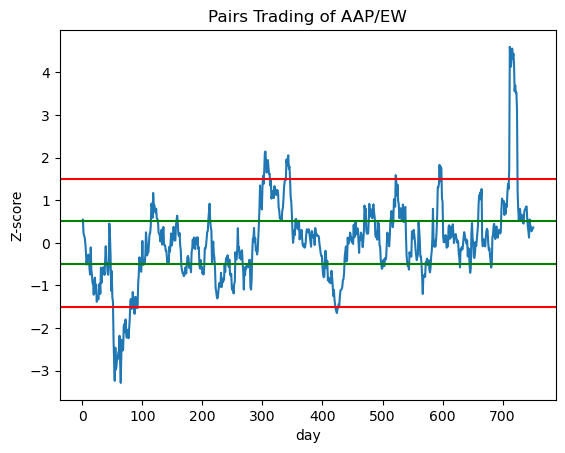

In [170]:
plt.plot(normalized)
plt.title("Pairs Trading of AAP/EW")
plt.axhline(y = 0.5, color = 'g')    
plt.axhline(y = -0.5, color = 'g')    
plt.axhline(y = 1.5, color = 'r')    
plt.axhline(y = -1.5, color = 'r')  
plt.xlabel("day")
plt.ylabel("Z-score")